# Global Blood Type Distribution Across The World!

---

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
%matplotlib inline

## Reading the dataframe

In [3]:
# Locating the zip file
zip_file = zipfile.ZipFile("./archive (1).zip")

# Printing file names in the zip file
for file in zip_file.filelist:
    print(file.filename)

bloodtypes.csv


In [79]:
# Reading the csv file within the zip
with zip_file.open('bloodtypes.csv') as c:
    df = pd.read_csv(c)
    
df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00


In [4]:
print('The dataframe has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe has 126 rows and 10 columns


## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     126 non-null    object 
 1   Population  126 non-null    int64  
 2   O+          126 non-null    float64
 3   A+          126 non-null    float64
 4   B+          126 non-null    float64
 5   AB+         126 non-null    float64
 6   O-          125 non-null    float64
 7   A-          125 non-null    float64
 8   B-          125 non-null    float64
 9   AB-         125 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
# Checking the null values
df.isnull().sum() 

Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            1
A-            1
B-            1
AB-           1
dtype: int64

In [7]:
# Checking the percentage of the null values

df_nulls = df.isnull().sum().to_frame().reset_index()
df_nulls = df_nulls.rename(columns={'index':'Column', 0:'NullValues'})
df_nulls['NullsPercentage (%)'] = (df_nulls['NullValues'] / df.shape[0]) * 100
df_nulls

,Column,NullValues,NullsPercentage (%)
0,Country,0,0.000000
1,Population,0,0.000000
2,O+,0,0.000000
3,A+,0,0.000000
4,B+,0,0.000000
5,AB+,0,0.000000
6,O-,1,0.793651
7,A-,1,0.793651
8,B-,1,0.793651
9,AB-,1,0.793651


In [8]:
# Detail checking for null value

df.loc[df['O-'].isna() == True]

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
32,Egypt,104124440,31.94,35.12,23.12,9.74,NaN,NaN,NaN,NaN


Since there is just one row with null values (representing 0.79% of all dataframe values) we can drop it!

In [9]:
df = df.dropna(axis=0)

In [10]:
# Describing the df

df.describe()

,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
count,1.250000e+02,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.192717e+08,40.418480,29.62144,16.349680,4.787840,3.916720,3.277200,1.334400,0.496320
std,7.124045e+08,10.003313,6.35822,7.570347,2.515139,2.531971,2.504496,0.861794,0.381944
min,3.913700e+04,25.500000,14.00000,4.720000,0.500000,0.060000,0.040000,0.010000,0.010000
25%,5.469612e+06,32.300000,25.80000,10.000000,2.900000,1.790000,1.000000,0.540000,0.150000
50%,1.209464e+07,38.200000,30.00000,15.000000,4.290000,4.000000,2.700000,1.250000,0.400000
75%,4.471214e+07,46.830000,34.40000,21.100000,6.300000,6.000000,6.000000,2.000000,0.910000
max,7.772851e+09,75.000000,46.30000,36.800000,14.700000,13.000000,8.000000,3.130000,1.200000


We can obserbe that in <code>Population</code> column we have an enormous max value of the Population in a row, potentially being an outlier. Lets describe it in detail

In [11]:
df.loc[df['Population'] == df['Population'].max()]

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
125,World,7772850805,37.37,27.24,22.83,6.22,2.69,2.09,1.16,0.4


Apperantly we have a row that contains all World information. We can divide the df into two: One the world information and the other country by country!

### All World Blood Type Distribution

In [76]:
df_world = df.loc[df['Population'] == df['Population'].max()]
df_world

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
125,World,7772850805,37.37,27.24,22.83,6.22,2.69,2.09,1.16,0.4


In [13]:
# Unpivoting the World DataFrame

melted_world_df = pd.melt(df_world, id_vars=['Country','Population'], value_vars=['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-'],
                    var_name='Blood_Type', value_name='Value')
melted_world_df

,Country,Population,Blood_Type,Value
0,World,7772850805,O+,37.37
1,World,7772850805,A+,27.24
2,World,7772850805,B+,22.83
3,World,7772850805,AB+,6.22
4,World,7772850805,O-,2.69
5,World,7772850805,A-,2.09
6,World,7772850805,B-,1.16
7,World,7772850805,AB-,0.40


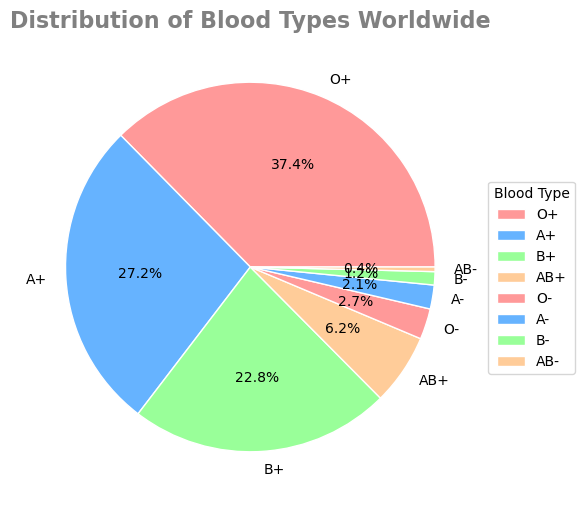

In [52]:
# Defineing custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Createing a pie chart
plt.figure(figsize=(6, 6))
plt.pie(melted_world_df['Value'], labels=melted_world_df['Blood_Type'], autopct='%1.1f%%', colors=colors,
        wedgeprops={'edgecolor': 'white'})

# Adding a title and customize it
plt.title('Distribution of Blood Types Worldwide', fontweight='bold', fontsize=16, color='grey')

# Moveing the legend outside the pie chart
legend = plt.legend(melted_world_df['Blood_Type'], title='Blood Type', loc='upper left', bbox_to_anchor=(1, 0.7))

# Showing the chart
plt.show()

### Country by country distribution

There is World value in one row. We can drop it, because we will use this notebook to compare countries.

In [29]:
df_cleaned = df.loc[df['Population'] != df['Population'].max()]
df_cleaned

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,3021324,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
...,...,...,...,...,...,...,...,...,...,...
120,Uzbekistan,30842796,29.42,30.93,24.98,9.27,1.68,1.77,1.42,0.53
121,Venezuela,28644603,58.30,28.20,5.60,1.90,3.70,1.80,0.40,0.10
122,Vietnam,98721275,41.70,21.90,30.80,4.98,0.30,0.10,0.20,0.02
123,Yemen,29884405,47.84,27.50,15.32,2.14,3.66,2.10,1.17,0.16


In [30]:
# Describing the cleaned df just to be sure we have the correct data

df_cleaned.describe()

,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
count,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,5.754930e+07,40.443065,29.640645,16.297419,4.776290,3.926613,3.286774,1.335806,0.497097
std,1.776729e+08,10.040102,6.380373,7.578385,2.522012,2.539816,2.512358,0.865146,0.383395
min,3.913700e+04,25.500000,14.000000,4.720000,0.500000,0.060000,0.040000,0.010000,0.010000
25%,5.469069e+06,32.225000,25.650000,9.900000,2.900000,1.767500,1.000000,0.530000,0.145000
50%,1.195299e+07,38.250000,30.000000,15.000000,4.270000,4.000000,2.715000,1.275000,0.415000
75%,4.412024e+07,46.842500,34.550000,21.070000,6.300000,6.000000,6.000000,2.000000,0.932500
max,1.397898e+09,75.000000,46.300000,36.800000,14.700000,13.000000,8.000000,3.130000,1.200000


In [53]:
def hist_plot(df,col):
    """
    This function is created to plot histograms of the blood type columns!
    """
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(data=df_cleaned, x=col, bins=25, alpha=0.7, kde=True)
    plt.title('Histogram of Blood Type ' + str(col), fontweight ='bold',fontsize=14, color='grey')
    plt.ylabel('Frequency', fontsize=13)
    plt.show()


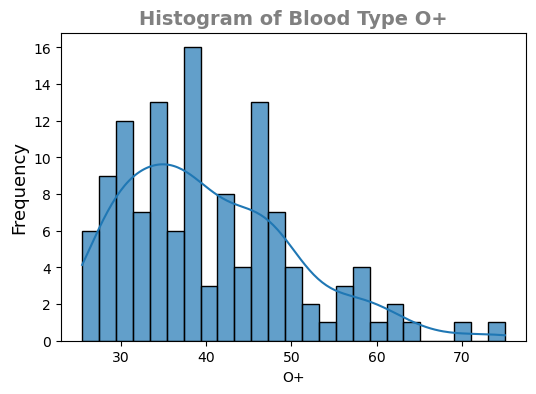

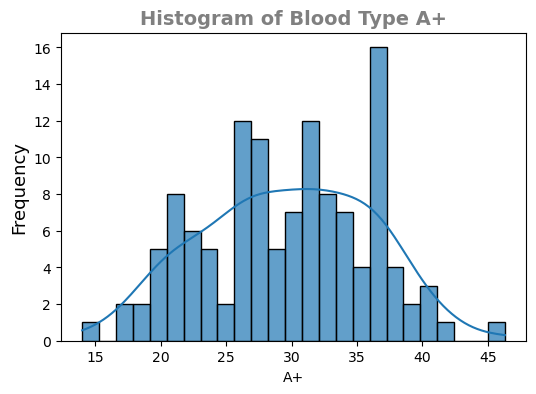

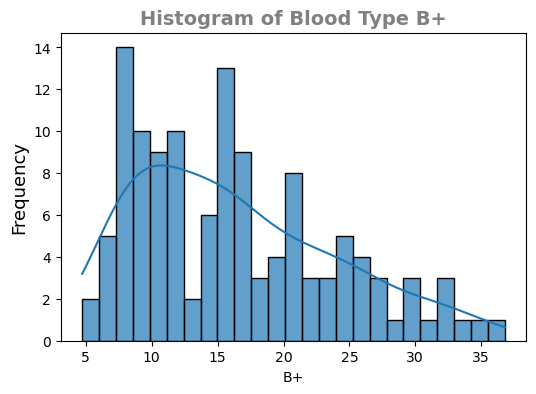

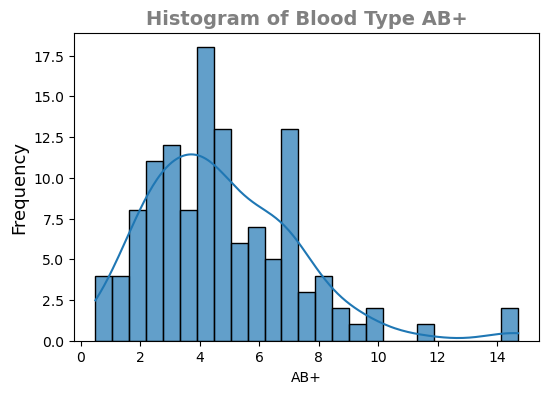

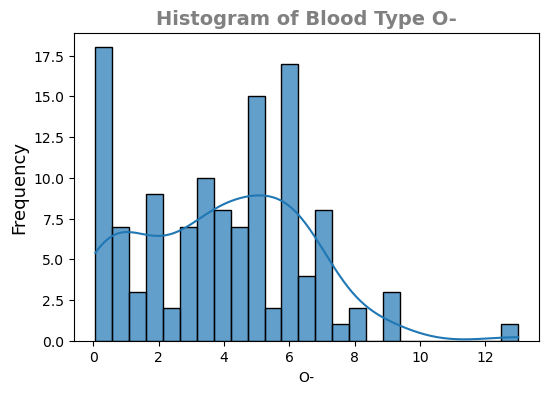

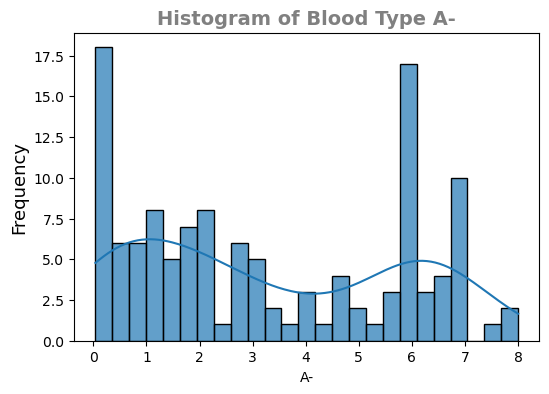

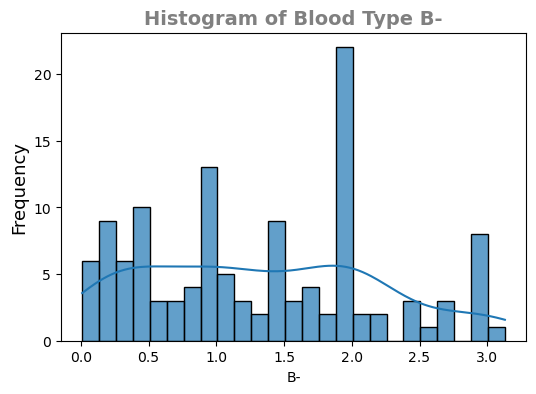

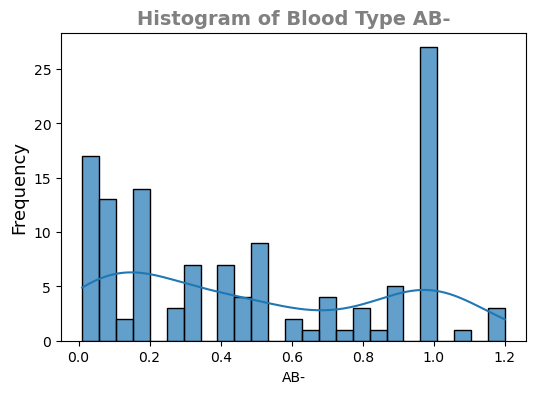

In [54]:
# Plotting O+ histogram
hist_plot(df_cleaned,'O+')

# Plotting A+ histogram
hist_plot(df_cleaned,'A+')

# Plotting B+ histogram
hist_plot(df_cleaned,'B+')

# Plotting AB+ histogram
hist_plot(df_cleaned,'AB+')

# Plotting O- histogram
hist_plot(df_cleaned,'O-')

# Plotting A- histogram
hist_plot(df_cleaned,'A-')

# Plotting B- histogram
hist_plot(df_cleaned,'B-')

# Plotting AB- histogram
hist_plot(df_cleaned,'AB-')

Although 'O+' blood type is clearly the most spread blood type in the whole world, we can check if the situation is different in any of the countries.

In [55]:
# Unpivoting the DataFrame

melted_cleaned_df = pd.melt(df_cleaned, id_vars=['Country','Population'], value_vars=['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-'],
                    var_name='Blood_Type', value_name='Value')
melted_cleaned_df

,Country,Population,Blood_Type,Value
0,Albania,3074579,O+,34.10
1,Algeria,43576691,O+,40.00
2,Argentina,45479118,O+,48.90
3,Armenia,3021324,O+,29.00
4,Australia,25466459,O+,38.00
...,...,...,...,...
987,Uzbekistan,30842796,AB-,0.53
988,Venezuela,28644603,AB-,0.10
989,Vietnam,98721275,AB-,0.02
990,Yemen,29884405,AB-,0.16


In [56]:
# Finding the indices of the rows with the highest 'Value' for each 'Country'
max_value_indices = melted_cleaned_df.groupby('Country')['Value'].idxmax()

# Selecting the rows using the indices
df_max_type = melted_cleaned_df.loc[max_value_indices]
df_max_type

,Country,Population,Blood_Type,Value
0,Albania,3074579,O+,34.10
1,Algeria,43576691,O+,40.00
2,Argentina,45479118,O+,48.90
127,Armenia,3021324,A+,46.30
4,Australia,25466459,O+,38.00
...,...,...,...,...
243,Uzbekistan,30842796,A+,30.93
120,Venezuela,28644603,O+,58.30
121,Vietnam,98721275,O+,41.70
122,Yemen,29884405,O+,47.84


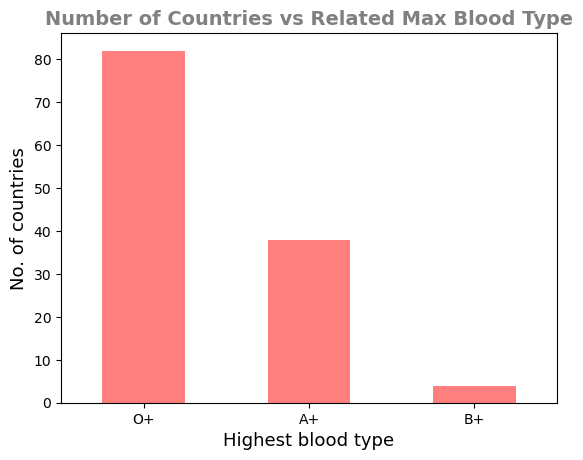

In [60]:
df_max_type['Blood_Type'].value_counts().plot(kind='bar', color='red', alpha=0.5)

plt.title('Number of Countries vs Related Max Blood Type', fontweight='bold', fontsize=14, color='grey')
plt.xlabel('Highest blood type', fontsize=13)
plt.ylabel('No. of countries', fontsize=13)

plt.xticks(rotation = 0)

plt.show()

Although 'AB-' blood type is clearly the least spread blood type in the whole world, we can check if the situation is different in any of the countries.

In [61]:
# Finding the indices of the rows with the lowest 'Value' for each 'Country'
min_value_indices = melted_cleaned_df.groupby('Country')['Value'].idxmin()

# Selecting the rows using the indices
df_min_type = melted_cleaned_df.loc[min_value_indices]
df_min_type

,Country,Population,Blood_Type,Value
868,Albania,3074579,AB-,0.90
869,Algeria,43576691,AB-,0.75
870,Argentina,45479118,AB-,0.25
871,Armenia,3021324,AB-,0.40
872,Australia,25466459,AB-,1.00
...,...,...,...,...
987,Uzbekistan,30842796,AB-,0.53
988,Venezuela,28644603,AB-,0.10
989,Vietnam,98721275,AB-,0.02
990,Yemen,29884405,AB-,0.16


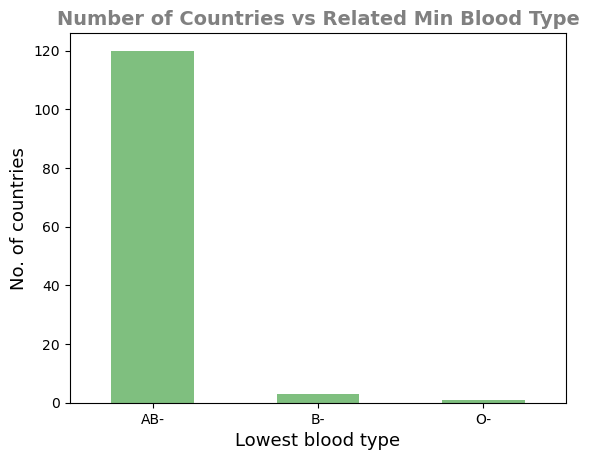

In [62]:
df_min_type['Blood_Type'].value_counts().plot(kind='bar', color='green', alpha=0.5)

plt.title('Number of Countries vs Related Min Blood Type', fontweight='bold', fontsize=14, color='grey')
plt.xlabel('Lowest blood type', fontsize=13)
plt.ylabel('No. of countries', fontsize=13)

plt.xticks(rotation = 0)

plt.show()

### Map Plotting of blood distribution

Soo in some countries we have a different blood type domination and in some we have different. We can use cmap plot, to visualize different blood type spead in different countries.

In [65]:
import geopandas as gpd

In [66]:
# Reading a world map GeoDataFrame using geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\Admin\AppData\Local\Temp\ipykernel_15128\4159066167.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [67]:
# Merging the readed world dataframe with the dataframe that contains max values od bloodtypes for each country

merged_data = world.merge(df_max_type, left_on='name', right_on='Country', how='left')
merged_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Population,Blood_Type,Value
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,935974.0,O+,43.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,37694085.0,O+,39.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN


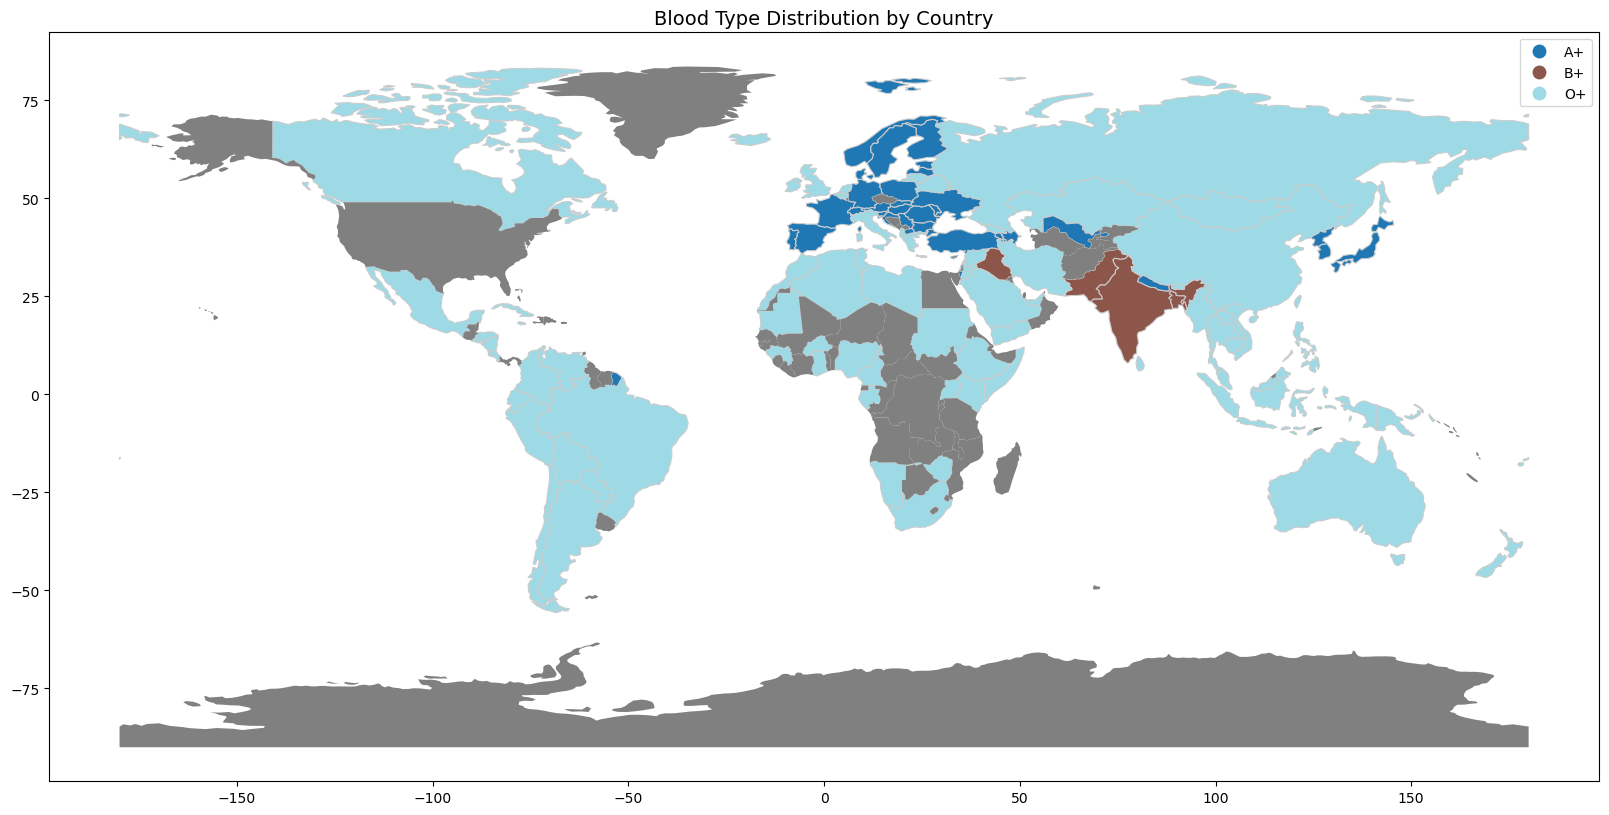

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

cmap = plt.get_cmap('tab20', len(df_max_type['Blood_Type'].unique()))

merged_data.plot(column='Blood_Type', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Setting gray color for missing countries
missing_data = merged_data[merged_data['Country'].isnull()]
missing_data.plot(color='gray', ax=ax, label='Missing countries')

plt.title("Blood Type Distribution by Country", fontsize=14)
plt.show()


We are missing some countries due to merging proces. This is because in one df (df_max_type) country name is "United States", in one df (world) country name is "United States of America". <br>
To overcome this issue we can consider using a fuzzy matching approach to find similar country names that might have slight variations.

In [70]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

C:\Users\Admin\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [71]:
# Creating a list of unique standardized country names from the world dataframe

standardized_country_names = world['name'].tolist()

In [72]:
# Performing fuzzy matching for each country name in df_max_type

def fuzzy_match_country(row):
    match, score = process.extractOne(row['Country'], standardized_country_names, scorer=fuzz.ratio)
    if score >= 50:  # Adjust the threshold as needed
        return match
    else:
        return None
    
df_max_type['Matched_Country'] = df_max_type.apply(fuzzy_match_country, axis=1)
df_max_type

,Country,Population,Blood_Type,Value,Matched_Country
0,Albania,3074579,O+,34.10,Albania
1,Algeria,43576691,O+,40.00,Algeria
2,Argentina,45479118,O+,48.90,Argentina
127,Armenia,3021324,A+,46.30,Armenia
4,Australia,25466459,O+,38.00,Australia
...,...,...,...,...,...
243,Uzbekistan,30842796,A+,30.93,Uzbekistan
120,Venezuela,28644603,O+,58.30,Venezuela
121,Vietnam,98721275,O+,41.70,Vietnam
122,Yemen,29884405,O+,47.84,Yemen


In [73]:
# Mergeing the dataframes using the matched country names
merged_data_fuzzy = world.merge(df_max_type, left_on='name', right_on='Matched_Country', how='left')
merged_data_fuzzy.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Population,Blood_Type,Value,Matched_Country
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,935974.0,O+,43.0,Fiji
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,37694085.0,O+,39.0,Canada
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,334998398.0,O+,37.4,United States of America


In [74]:
# Checking the number of countries (Should be 124)

merged_data_fuzzy[merged_data_fuzzy['Country'].isnull() == False]['Country'].count()

124

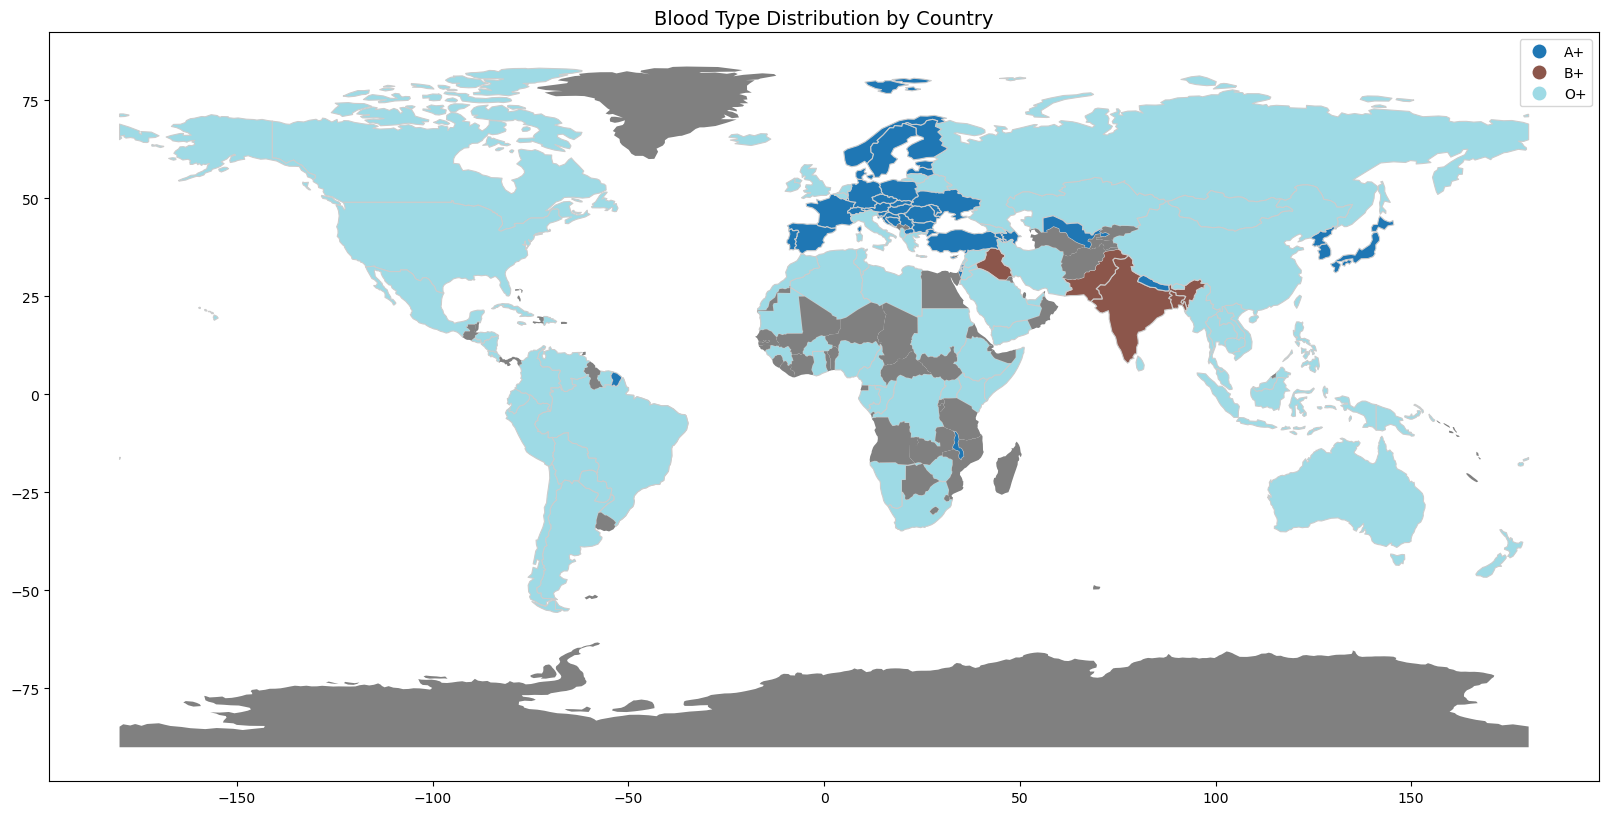

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

cmap = plt.get_cmap('tab20', len(df_max_type['Blood_Type'].unique()))

merged_data_fuzzy.plot(column='Blood_Type', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Setting gray color for missing countries
missing_data = merged_data_fuzzy[merged_data_fuzzy['Country'].isnull()]
missing_data.plot(color='gray', ax=ax, label='Missing countries')

plt.title("Blood Type Distribution by Country", fontsize=14)
plt.show()


---

## Summary

By analysing the dataset, provided from Kaggle we found out that:

* The predominant blood types in the world are "O+", "A+" and "B+"

* The predominant blood type in Europe is "A+", which is not usual across the world.

* The same situation is in India as well - with predominant blood type "B+"

* In other parts of the world, as ecpected the most predominant blood type is "O+"

* The least blood types in the world are "AB-", "B-", "0-"


Dataset link: https://www.kaggle.com/datasets/kamilenovaes/global-blood-type-distribution

---

**Author:** Endrit Mustafa